PART 3

In [3]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
df_x = pd.read_csv("../data/Q3/logisticX.csv",header=None)
df_y = pd.read_csv("../data/Q3/logisticY.csv",header = None)
df = pd.concat([df_x, df_y], axis=1)

In [5]:
x_train  = np.loadtxt("../data/Q3/logisticX.csv", delimiter=",")
y_train = np.loadtxt("../data/Q3/logisticY.csv", delimiter=",")
y_train = y_train.reshape((x_train.shape[0],1))

In [6]:
df.describe()

,0,1,0
count,100.000000,100.000000,100.000000
mean,4.618717,4.522868,0.500000
std,1.325572,1.394154,0.502519
min,1.440000,1.537200,0.000000
25%,3.706600,3.595875,0.000000
50%,4.523700,4.544700,0.500000
75%,5.539200,5.506450,1.000000
max,8.415300,7.505700,1.000000


In [7]:
X_train = np.ones((x_train.shape[0],x_train.shape[1]+1))
for i in range(x_train.shape[0]):
    for j in range(1,1+x_train.shape[1]):
        X_train[i][j] = x_train[i][j-1]

Normalization 

In [8]:
def normalise(X_train):
    mean_x_train = np.mean(X_train,axis = 0)
    std_x_train = np.std(X_train,axis = 0)
    mean_x_train[0] = 0
    std_x_train[0]  = 1
    for j in range(X_train.shape[1]):
        X_train[:,j] = (X_train[:,j] - mean_x_train[j])/std_x_train[j]
    return X_train
X_train = normalise(X_train)
    

In [9]:
B = np.zeros((1,X_train.shape[1]))

In [10]:
def sigmoid(X,B):
    return 1/(1+np.exp(-X@B.T))

def log_liklehood(Y,X,B):
    L = 0
    for i in range(X.shape[0]):
        
        L += Y[i,0] * np.log(sigmoid(X[i],B)) + (1-Y[i,0]) * np.log(1-sigmoid(X[i],B))
    return L

def H_B(X,B):
    res = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        res[i,0] = sigmoid(X[i],B).item()
    return res    

def gradient_log_liklehood(Y,X,B):
    return (X.T @ (Y - H_B(X,B)))

def hessian(X,B):
    p = H_B(X,B).flatten()
    R = np.diag(p * (1 - p))
    return -(X.T @ (R @ X))

def hessian_inv(X,B):
    return np.linalg.inv(hessian(X,B))
        
 


In [11]:
def newtons_upadte(Y,X,e):
    B = np.zeros((1,X.shape[1]))
    grad_norm = np.linalg.norm(gradient_log_liklehood(Y,X,B))
    iter = 0
    while grad_norm>e:
        B = (B.T - (hessian_inv(X,B) @ gradient_log_liklehood(Y,X,B))).T
        grad_norm = np.linalg.norm(gradient_log_liklehood(Y,X,B))
        iter += 1
        print(f"iter = {iter} , B = {B}  , gradient_norm = {grad_norm} ")
    return B    



In [12]:
B_newton = newtons_upadte(y_train,X_train,1e-12)

iter = 1 , B = [[-1.53561869e-16  8.97341408e-01 -9.20112283e-01]]  , gradient_norm = 13.304516164097624 
iter = 2 , B = [[ 0.0916248   1.54658764 -1.57249997]]  , gradient_norm = 4.70527341691889 
iter = 3 , B = [[ 0.22925374  2.10393545 -2.18620038]]  , gradient_norm = 1.4331770243983828 
iter = 4 , B = [[ 0.35177461  2.46348281 -2.59033635]]  , gradient_norm = 0.288953147491754 
iter = 5 , B = [[ 0.39743593  2.57939935 -2.71602845]]  , gradient_norm = 0.01963465980794968 
iter = 6 , B = [[ 0.40123187  2.58849794 -2.7255376 ]]  , gradient_norm = 0.00010634799173727671 
iter = 7 , B = [[ 0.40125316  2.5885477  -2.72558849]]  , gradient_norm = 3.1316116578276182e-09 
iter = 8 , B = [[ 0.40125316  2.5885477  -2.72558849]]  , gradient_norm = 8.763157002212944e-16 


In [13]:
print(B_newton)

[[ 0.40125316  2.5885477  -2.72558849]]


Predictions 

In [14]:
p_predicted = H_B(X_train,B_newton)
y_predicted = np.zeros(p_predicted.shape)

for i in range(p_predicted.shape[0]):
    if p_predicted[i] >= 0.5 :
        y_predicted[i] = 1

comp = np.zeros(p_predicted.shape)

for i in  range(p_predicted.shape[0]):
    if y_predicted[i] == y_train[i]:
        comp[i] = 1

print(sum(comp))

[88.]


In [15]:


def draw_plots(y,X,B):
    y = y.flatten()
    plt.clf()
    plt.scatter(X[y==0, 1], X[y==0, 2], marker='o', color='red', label='Lable 0')
    plt.scatter(X[y==1, 1], X[y==1, 2], marker='x', color='blue', label='Lable 1')

    x1_vals = np.linspace(min(X[:,1])-1, max(X[:,1])+1, 100)
    x2_vals = -(B[0,0] + B[0,1]*x1_vals) / B[0,2]
    plt.plot(x1_vals, x2_vals, 'g-', label='Decision boundary')

    plt.xlabel('x1 normalised')
    plt.ylabel('x2 normalised')
    plt.legend()
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

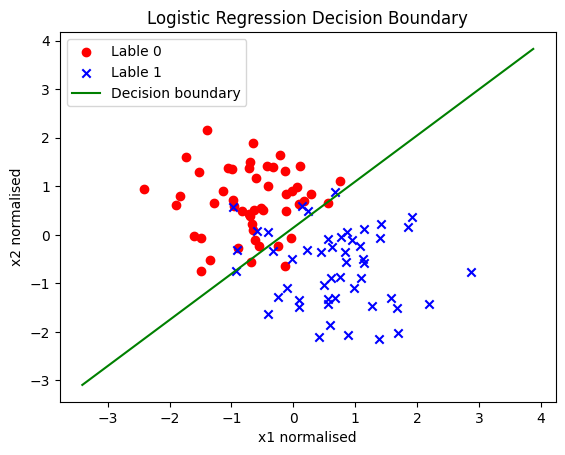

In [16]:
draw_plots(y_train,X_train,B_newton)